# TCSS 478 Final Project
### RNA-seq-freqs 
Ye Li, Michael Theisen, Trevor Tomlin

### Dataset 1 GSE122505

In [1]:
# installation instructions from http://bioconductor.org/install/
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.14")

Bioconductor version '3.14' is out-of-date; the current release version '3.16'
  is available with R version '4.2'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.20), R 4.1.1 (2021-08-10)

Old packages: 'arkhe', 'brew', 'broom', 'cachem', 'caret', 'class', 'classInt',
  'cli', 'codetools', 'colorspace', 'conflicted', 'covr', 'credentials',
  'curl', 'data.table', 'dbplyr', 'devtools', 'dplyr', 'DT', 'dtplyr', 'e1071',
  'evaluate', 'expm', 'fansi', 'fastmap', 'FNN', 'fontawesome', 'forcats',
  'forecast', 'fracdiff', 'fs', 'future', 'gargle', 'gert', 'ggplot2',
  'ggrepel', 'gh', 'git2r', 'gitcreds', 'gower', 'gstat', 'gtools', 'haven',
  'highr', 'htmlwidgets', 'httpuv', 'httr', 'ipred', 'IRdisplay', 'IRkernel',
  'isoband', 'janitor', 'keras', 'knitr', 'lav

In [2]:
load ("AML_datasets.RData")
ls()
typeof(data.1)
typeof(info.1)

[1] "data.1" "data.2" "data.3" "info.1" "info.2" "info.3"

[1] "double"

[1] "list"

### Gene Expression Data "data.1"

In [3]:
dim(data.1)
data.1[1:5,1:5]

[1] 12708  2500

,AHW_ALL_BA_025919_13_A_PZ.CEL,AHW_ALL_BA_032751_71_A_PZ.CEL,AHW_ALL_BN_022495_7_A_PZ.CEL,AHW_ALL_MLL_031351_13_A_PZ.CEL,AHW_ALL_MLL_036187_80_A_PZ.CEL
PAX8,9.221573,8.524435,8.606060,8.841501,8.882826
CCL5,7.990144,6.648112,6.382602,6.469583,8.332415
MMP14,8.391732,8.183514,7.909023,8.105744,7.820992
DTX2P1-UPK3BP1-PMS2P11,9.280415,8.798847,8.948909,8.941517,8.725958
BAD,5.579486,5.934621,5.646312,5.899868,5.651731


### Phenotype Data (meta data) "info.1"

In [4]:
dim(info.1)
info.1[1:5,]

[1] 2500    8

,Dataset,GSE,Condition,Disease,Tissue,FAB,Filename,FAB_all
,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
AHW_ALL_BA_025919_13_A_PZ.CEL,1,Haferlach,CONTROL,ALL,BM or PBMC,unknown,AHW_ALL_BA_025919_13_A_PZ.CEL,unknown
AHW_ALL_BA_032751_71_A_PZ.CEL,1,Haferlach,CONTROL,ALL,BM or PBMC,unknown,AHW_ALL_BA_032751_71_A_PZ.CEL,unknown
AHW_ALL_BN_022495_7_A_PZ.CEL,1,Haferlach,CONTROL,ALL,BM or PBMC,unknown,AHW_ALL_BN_022495_7_A_PZ.CEL,unknown
AHW_ALL_MLL_031351_13_A_PZ.CEL,1,Haferlach,CONTROL,ALL,BM or PBMC,unknown,AHW_ALL_MLL_031351_13_A_PZ.CEL,unknown
AHW_ALL_MLL_036187_80_A_PZ.CEL,1,Haferlach,CONTROL,ALL,BM or PBMC,unknown,AHW_ALL_MLL_036187_80_A_PZ.CEL,unknown


In [5]:
# We begin by transposing the data.1 matrix and then merge it into info.1.
total.mat <- merge(info.1, t(data.1), by=0, total=TRUE) # Fully merged matrix of all data.

# We filter out only the "CASE" Conditions of AML using 'which'. 
aml.mat <- which (total.mat[ , "Condition"] == "CASE") # Matrix of only "CASE" Conditions.
my.aml.mat <- total.mat[aml.mat,]

Caml.mat <- which (total.mat[ , "Condition"] == "CONTROL") # Matrix of only "CONTROL" Conditions.
my.Caml.mat <- total.mat[Caml.mat,]


In [6]:
# Apply the function to find p-values.
pvalues <-apply(t(data.1), 2, function (x) {t.test(x[aml.mat], x[Caml.mat])$p.value})

# Sort the p-values.
pvalues.sorted <- sort (pvalues)

# Obtain the 10 genes with lowest p-values. 
AMLsignatures <- names(pvalues.sorted[1:10])

AMLexpressions <- data.frame(t(data.1)[c(aml.mat, Caml.mat), AMLsignatures])
dim(AMLexpressions)
AMLexpressions[1:5,]



[1] 2500   10

,CREG1,ERLIN1,MAPKAPK3,CD22,CD79A,KIT,POU2AF1,CD79B,CFD,CD19
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALK_AML_aa_033949_63_A_PZ.CEL,11.48920,9.512312,10.517579,5.975383,6.449247,7.789863,5.405794,5.977759,9.699617,6.516947
ALK_AML_com_001171_40_A_PZ.CEL,10.59713,10.342425,10.372676,6.952190,7.903524,9.360848,5.415383,5.875290,9.686428,6.835871
ALK_AML_com_020894_99_A_PZ.CEL,10.90133,8.350713,9.687879,5.965832,6.860455,8.656720,5.477094,6.050028,7.545196,6.504802
ALK_AML_com_034881_45_A_PZ.CEL,11.15819,10.534462,9.810212,6.406722,7.105373,9.684748,8.641101,5.965243,7.816802,6.939049
ALK_AML_M2_000167_51_A_PZ.CEL,10.25239,10.138553,10.629194,6.074368,7.357112,9.609804,6.033675,6.896718,10.601683,7.859362


In [7]:
# Make a AMC_CASE_vs_NON_AML_CONTROL.txt file with the data from AMLexpressions
write.table(AMLexpressions[1:5,], file='AMC_CASE_vs_NON_AML_CONTROL.txt')

[1] "The median correlation across all pairs of genes is:  0.306316930696786"


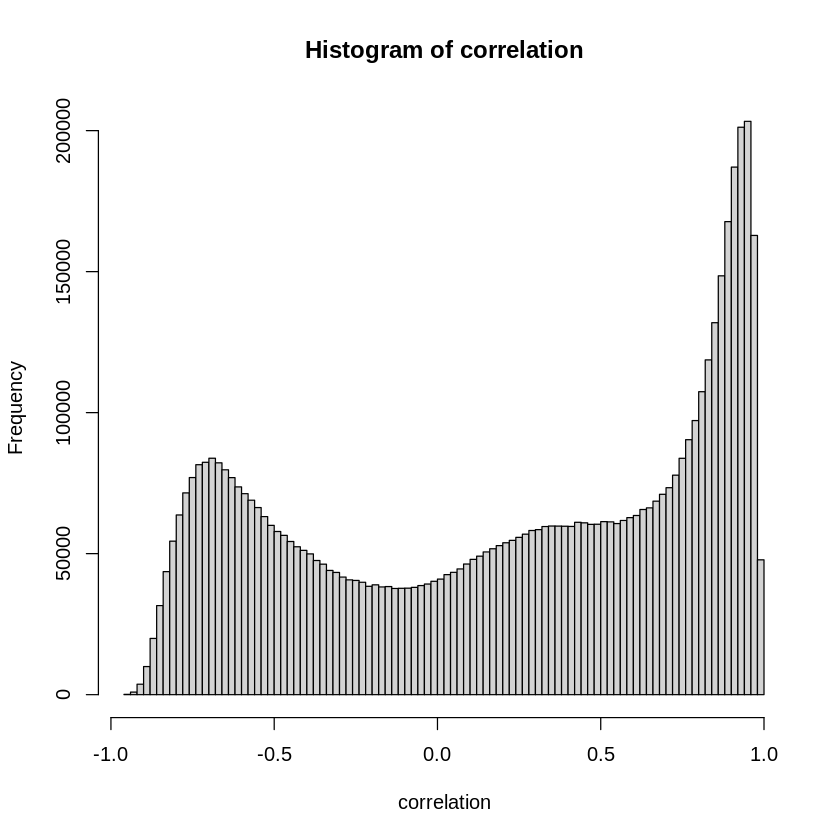

In [8]:

correlation <- cor(t(AMLexpressions))
diag(correlation) <- NA
medcor <- median(correlation, na.rm=TRUE)
print(paste("The median correlation across all pairs of genes is: ", (medcor)))
hist(correlation, nclass=100)


In [9]:
library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [10]:
set.seed(1111)

In [11]:
# Using a 70:30 split
trainingIndex <- createDataPartition(info.1$Disease == "healthy", p = .7, list = FALSE, times=1)

training.info <- info.1[trainingIndex, ,drop=FALSE]
testing.info <- info.1[-trainingIndex, ,drop=FALSE]

training.data <- AMLexpressions[trainingIndex,]
testing.data <- AMLexpressions[-trainingIndex,]



In [12]:
null.model <- glm(training.info[,1] ~1, data = training.data, family= binomial)
model <- glm(training.info[,1] ~ ., data = training.data, family = binomial)
step.model <- step (model, data=training.data, direction="forward", trace = 0)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”


In [13]:
summary(step.model)


Call:
glm(formula = training.info[, 1] ~ CREG1 + ERLIN1 + MAPKAPK3 + 
    CD22 + CD79A + KIT + POU2AF1 + CD79B + CFD + CD19, family = binomial, 
    data = training.data)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
2.409e-06  2.409e-06  2.409e-06  2.409e-06  2.409e-06  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.657e+01  2.364e+05       0        1
CREG1        4.806e-07  1.107e+04       0        1
ERLIN1      -1.938e-08  1.314e+04       0        1
MAPKAPK3    -6.170e-08  1.742e+04       0        1
CD22         9.774e-08  1.714e+04       0        1
CD79A       -1.578e-07  1.608e+04       0        1
KIT          7.630e-08  6.643e+03       0        1
POU2AF1      2.981e-08  1.012e+04       0        1
CD79B        2.419e-07  1.329e+04       0        1
CFD          2.132e-07  6.095e+03       0        1
CD19         2.614e-07  1.265e+04       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null

In [14]:
# get the glm object recommended by forward selection
glmFit1 <- glm(formula = training.info[, 1] ~ CREG1 + ERLIN1 + MAPKAPK3 + 
    CD22 + CD79A + KIT + POU2AF1 + CD79B + CFD + CD19, family = binomial, 
    data = training.data)
# using the model recommended by forward selection, we want to predict Pr(Y=1)
pred1 <- predict(glmFit1, type= "response")

# accuracy
theTable <- table (training.info[, 1], round(pred1))
theTable

# why is this not showing errors? 1751 true positives

Warning message:
“glm.fit: algorithm did not converge”


   
       1
  1 1751

In [15]:
step.model.backward <- step (null.model, scope=list(upper=model), data=train.data, direction="backward", trace=0)
summary(step.model.backward)


Call:
glm(formula = training.info[, 1] ~ 1, family = binomial, data = training.data)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
2.409e-06  2.409e-06  2.409e-06  2.409e-06  2.409e-06  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)    26.57    8510.54   0.003    0.998

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 1750  degrees of freedom
Residual deviance: 1.0159e-08  on 1750  degrees of freedom
AIC: 2

Number of Fisher Scoring iterations: 25


In [16]:
# info.1[1030:1050,] # shows a good data fram for GSE9476, a subset of info.1

In [17]:
# We filter out only the "GSE10255" GSE of AML using 'which'. 
GSE.mat <- which (total.mat[ , "GSE"] == "GSE9476") 
GSE.mat # is a vector
GSEfocused.mat <- total.mat[GSE.mat,] # Matrix consisting of only genes

[1] 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033
[16] 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048
[31] 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063
[46] 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078
[61] 1079 1080 1081 1082

In [18]:
CASE.GSEfocused.mat <- which (GSEfocused.mat[ , "Condition"] == "CASE")
CASE.GSEfocused.mat # is a vector
CASEfocused.GSEfocused.mat <- total.mat[CASE.GSEfocused.mat,-(0:9)] # Matrix consisting of only CASE with GSE
CASEfocused.GSEfocused.mat[1:5,1:5]

[1] 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
[26] 44

,PAX8,CCL5,MMP14,DTX2P1-UPK3BP1-PMS2P11,BAD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,9.601100,9.191627,8.417960,9.341515,6.360647
20,8.848924,7.881371,8.130892,9.441689,6.342363
21,8.562352,7.384051,7.721752,8.810173,5.987559
22,8.738098,6.844174,7.985319,8.961419,6.119631
23,8.603270,8.480407,7.749494,8.379326,5.831658


In [19]:
CONTROL.GSEfocused.mat <- which (GSEfocused.mat[ , "Condition"] == "CONTROL")
CONTROL.GSEfocused.mat # is a vector
CONTROLfocused.GSEfocused.mat <- total.mat[CONTROL.GSEfocused.mat,-(0:9)] # MAtrix consisting of only CONTROL with GSE
CONTROLfocused.GSEfocused.mat[1:5,1:5]

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 45 46 47 48 49 50 51
[26] 52 53 54 55 56 57 58 59 60 61 62 63 64

,PAX8,CCL5,MMP14,DTX2P1-UPK3BP1-PMS2P11,BAD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.221573,7.990144,8.391732,9.280415,5.579486
2,8.524435,6.648112,8.183514,8.798847,5.934621
3,8.606060,6.382602,7.909023,8.948909,5.646312
4,8.841501,6.469583,8.105744,8.941517,5.899868
5,8.882826,8.332415,7.820992,8.725958,5.651731


In [21]:
pvalues2 <-apply(data.1, 2, function (x) {t.test(x[CASEfocused.GSEfocused.mat], x[CONTROLfocused.GSEfocused.mat])$p.value}) 
# why did this just stop working the day the paper is due? What changed? The error message doesn't help.
pvalues2.sorted <- sort (pvalues2)

In [22]:
GSEsignatures <- names(pvalues2.sorted[,1:10])

GSEexpressions <- data.frame(data.1[c(CASE.GSEfocused.mat, CONTROL.GSEfocused.mat), GSEsignatures])
dim(GSEexpressions)
GSEexpressions[1:5,]
correlation2 <- cor((GSEexpressions))
diag(correlation2) <- NA
medcor <- median(correlation2, na.rm=TRUE)
print(paste("The median correlation across all pairs of drugs is: ", (medcor)))
hist(correlation2, nclass=100)



ERROR: Error in eval(expr, envir, enclos): object 'pvalues2.sorted' not found


In [58]:
rownames(CASEfocused.GSEfocused.mat) <- total.mat[CASE.GSEfocused.mat, 1]  # First column of total.mat (Expirement names) is added back in as the row names.
CASEfocused.GSEfocused.mat[1:5,1:10]
dim(CASEfocused.GSEfocused.mat)

,PAX8,CCL5,MMP14,DTX2P1-UPK3BP1-PMS2P11,BAD,PRPF8,CAPNS1,RPL35,EIF4G2,EIF3D
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALK_ALL_814_040330_9_A_PZ.CEL,9.601100,9.191627,8.417960,9.341515,6.360647,9.290239,9.550719,9.788408,10.76943,10.164625
ALK_ALL_B_036348_28_A_PZ.CEL,8.848924,7.881371,8.130892,9.441689,6.342363,10.090529,10.735658,11.776457,11.27952,10.980908
ALK_ALL_BA_014872_56_A_PZ.CEL,8.562352,7.384051,7.721752,8.810173,5.987559,9.766628,10.140347,12.228942,10.98017,11.738627
ALK_ALL_BA_021833_24_A_PZ.CEL,8.738098,6.844174,7.985319,8.961419,6.119631,10.014967,9.755260,11.480863,11.90249,9.875456
ALK_ALL_BA_033676_8_A_PZ.CEL,8.603270,8.480407,7.749494,8.379326,5.831658,9.561271,9.383719,10.431158,11.62102,9.465095


[1]    26 12708

In [59]:
rownames(CONTROLfocused.GSEfocused.mat) <- total.mat[CONTROL.GSEfocused.mat, 1]  # First column of total.mat (Expirement names) is added back in as the row names.
CONTROLfocused.GSEfocused.mat[1:5,1:10]
dim(CONTROLfocused.GSEfocused.mat)

,PAX8,CCL5,MMP14,DTX2P1-UPK3BP1-PMS2P11,BAD,PRPF8,CAPNS1,RPL35,EIF4G2,EIF3D
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AHW_ALL_BA_025919_13_A_PZ.CEL,9.221573,7.990144,8.391732,9.280415,5.579486,9.587992,10.143771,11.36457,10.95629,10.02699
AHW_ALL_BA_032751_71_A_PZ.CEL,8.524435,6.648112,8.183514,8.798847,5.934621,10.605028,10.613034,11.66462,11.63216,11.41284
AHW_ALL_BN_022495_7_A_PZ.CEL,8.606060,6.382602,7.909023,8.948909,5.646312,10.367226,9.836321,12.08132,11.69096,10.96611
AHW_ALL_MLL_031351_13_A_PZ.CEL,8.841501,6.469583,8.105744,8.941517,5.899868,10.493261,10.701126,12.02987,11.32870,11.17608
AHW_ALL_MLL_036187_80_A_PZ.CEL,8.882826,8.332415,7.820992,8.725958,5.651731,10.684440,10.524360,11.85613,11.38861,11.11774


[1]    38 12708